In [ ]:
import gym
import numpy as np
from gym import error, spaces, utils, Env
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_dtypes]
/usr/local/lib/python3.7/dist-packages/scipy/special/orthogonal.py:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecati

In [ ]:
!pip install -U gym

     |████████████████████████████████| 626 kB 3.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gym: filename=gym-0.23.1-py3-none-any.whl size=701375 sha256=53e730bf5d05f91fe7bf1832703d4a9985cf308caa89ba757897c01420807961
  Stored in directory: /root/.cache/pip/wheels/e3/33/04/6723848e46f0f1ebe794bb329b7c761c3329a0d7ffade99da7
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.17.3
    Uninstalling gym-0.17.3:
      Successfully uninstalled gym-0.17.3


# Descripción del problema

El siguiente ejemplo consiste en un Ambiente (Room). La temperatura de la habitación cambia debido a la temperatura externa ambiente (se asume de forma desconocida). La habitación cuenta con un equipo de Aire Acondicionado controlado por un Agente. El objetivo de este Agente es mantener la temperatura en 0 grados. El Aire Acondicionado puede cambiar la temperatura en 0, 1, 2 o 3 grados ya sea frío o calor.

# Ambiente

El ambiente (Room) está simulado por el siguiente código

In [ ]:
class Room(Env):
    
    def __init__(self):
        self.observation_space = spaces.Box(low=-20, high=40, shape=(), dtype=np.float32)
        self.action_space = spaces.Discrete(7, start=-3)
                  
    def reset(self):
        self.step_count = 0
        self.initial_random = self.observation_space.sample()
        self.external_temp = 0
        self.external_temp = self._temp_variation()
        self.temp = self.external_temp
        return self.temp
    
    def step(self, action):
        delta_temp = self._temp_variation()
        self.external_temp += delta_temp
        self.temp += delta_temp + action
        self.step_count += 1
        return self.temp

    def _temp_variation(self):
        x = self.initial_random + self.step_count
        return np.float64('%.2f'%(20 * np.sin(x/10))) - self.external_temp 
          

# Test Room

In [ ]:
env = Room()

In [ ]:
env.observation_space

Box(-20.0, 40.0, (), float32)

In [ ]:
env.observation_space.sample()

array(-5.8779187, dtype=float32)

In [ ]:
env.action_space

Discrete(7, start=-3)

In [ ]:
env.action_space.sample()

-2

In [ ]:
env.reset()

-5.88

# Reflex Agente

Esta es la implementación de un Agente Reflejo Simple, que dada la observación (temperatura de la habitación), toma una acción de enfriar o calentar en 0, 1, 2 o 3 grados. El agente solo enfría o calienta si la temperatura difiere en más de 2 grados.

In [ ]:
class AgentReflex():

    def lookup(self, obs):
        if obs > 9:
            return -3
        elif obs > 5:
            return -2
        elif obs < -9:
            return 3
        elif obs < -5:
            return 2
        else:
            return 0

# Test Reflex

In [ ]:
agent = AgentReflex()

In [ ]:
obs = env.reset()
external_res = []
agent_res = []
total_steps = 100

In [ ]:
for i in range(0, total_steps):  
    
    # solamente para evaluar la evolución de la temperatura de la habitación con y sin agente
    # la temperatura de la habitación sin el agente es igual a la temperatura exterior
    
    external_temp = env.external_temp
    external_res.append(external_temp)
    
    # decisión y acción del agente
    
    prev_obs = obs
    action = agent.lookup(obs)
    obs = env.step(action)
    agent_res.append(obs)  
    
    print('External:', external_temp, '\n','Prev. Obs:', prev_obs, '-> Action:', action, '-> Room:', obs)

External: -2.16 
 Prev. Obs: -2.16 -> Action: 3 -> Room: 0.8399999999999999
External: -2.16 
 Prev. Obs: 0.8399999999999999 -> Action: -1 -> Room: -2.1399999999999997
External: -4.14 
 Prev. Obs: -2.1399999999999997 -> Action: 3 -> Room: -1.0700000000000003
External: -6.07 
 Prev. Obs: -1.0700000000000003 -> Action: 3 -> Room: 0.05999999999999961
External: -7.94 
 Prev. Obs: 0.05999999999999961 -> Action: 0 -> Room: -1.7300000000000004
External: -9.73 
 Prev. Obs: -1.7300000000000004 -> Action: 2 -> Room: -1.4299999999999997
External: -11.43 
 Prev. Obs: -1.4299999999999997 -> Action: 3 -> Room: -0.009999999999999787
External: -13.01 
 Prev. Obs: -0.009999999999999787 -> Action: 1 -> Room: -0.46000000000000085
External: -14.46 
 Prev. Obs: -0.46000000000000085 -> Action: 1 -> Room: -0.7699999999999996
External: -15.77 
 Prev. Obs: -0.7699999999999996 -> Action: 2 -> Room: 0.0799999999999983
External: -16.92 
 Prev. Obs: 0.0799999999999983 -> Action: 0 -> Room: -0.8999999999999986
Exter

# Graficando los resultados

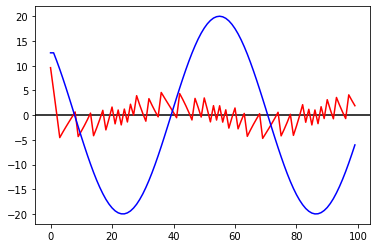

In [ ]:
plt.axhline(color='black')                                  #Temperatura ideal
plt.plot(range(0, total_steps), agent_res, color='red')     #Temperatura con el agente
plt.plot(range(0, total_steps), external_res, color='blue') #Temperatura sin agente

# Métrica de Performance
Una posible métrica de performance, podría ser ver la temperatura media del ambiente con la acción del agente.

In [ ]:
print("Temperatura media con el agente: ", np.mean(agent_res))
print("Temperatura media sin el agente: ", np.mean(external_res))

Temperatura media con el agente:  0.014799999999999685
Temperatura media sin el agente:  -3.2981999999999996


Otra posible métrica de performance, es evaluar para cada instante de tiempo (step) cuanto difiere la temperatura obtenida de la objetivo=0. Esto se puede hacer con mean_squared_error o mean_absolute_error. 
Comparemos la métrica obtenida por el agente contra la métrica obtenida sin un agente:

In [ ]:
goal_temp = np.zeros(total_steps)
print("Variación media con el agente: ", mean_absolute_error(goal_temp, agent_res))
print("Variación media sin el agente: ", mean_absolute_error(goal_temp, external_res))

Variación media con el agente:  1.9997999999999998
Variación media sin el agente:  12.5738


# Ejercicio: Model (Goal / Utility) Based Agent 

# Primer cambio

Mucha mas agresividad

In [ ]:
class AgentReflex():

    def lookup(self, obs):
        if obs > 0:
            return -3
        elif obs < 0:
            return 3
        else:
            return 0

In [ ]:
goal_temp = np.zeros(total_steps)
print("Variación media con el agente: ", mean_absolute_error(goal_temp, agent_res))
print("Variación media sin el agente: ", mean_absolute_error(goal_temp, external_res))

Variación media con el agente:  2.1673
Variación media sin el agente:  12.986500000000001


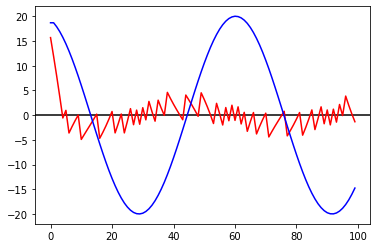

In [ ]:
plt.axhline(color='black')                                  #Temperatura ideal
plt.plot(range(0, total_steps), agent_res, color='red')     #Temperatura con el agente
plt.plot(range(0, total_steps), external_res, color='blue') #Temperatura sin agente

Construir un Agente basado en un modelo. 
Esto es: 
    - Construir un modelo a mano, por ejemplo un grafo, con estados y transiciones [Ver figura].
    - Discretizar las observaciones devueltas por el ambiente mapeándolas a un estado.
    - Tomar una decisón basada en el estado.
    - Definir un objetivo y una utilidad

Por ejemplo, el Agente podría conocer un modelo que tiene 2 estados {Frío, Calor}
<img src="Modelo.png">


# Segundo cambio

Menos agresividad

In [ ]:
class AgentReflex():
  def lookup(self, obs):
        if obs > 2:
            return -3
        if obs > 1:
            return -2
        if obs > 0.5:
            return -1
        elif obs < -2:
            return 3
        elif obs < -1:
            return 2  
        elif obs < -0.5:
            return 1
        else:
            return 0

In [ ]:
goal_temp = np.zeros(total_steps)
print("Variación media con el agente: ", mean_absolute_error(goal_temp, agent_res))
print("Variación media sin el agente: ", mean_absolute_error(goal_temp, external_res))

Variación media con el agente:  1.1638000000000002
Variación media sin el agente:  12.6649


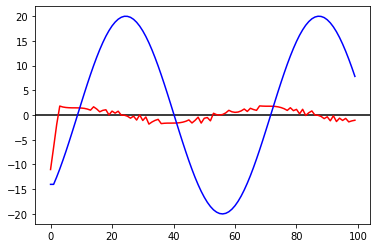

In [ ]:
plt.axhline(color='black')                                  #Temperatura ideal
plt.plot(range(0, total_steps), agent_res, color='red')     #Temperatura con el agente
plt.plot(range(0, total_steps), external_res, color='blue') #Temperatura sin agente

# Tercer cambio

Modelo

In [ ]:
class AgentReflex():
  def __init__(self):
    self.prev = 0

  def update_model(self,  obs):
    if obs < 0 and self.prev < 0:
      self.model = "frio"
    elif obs > 0 and self.prev > 0:
      self.model = "calor"
    else:
      self.model = "neutro"

  def lookup(self, obs):
        self.update_model(obs)
        if obs > 2:
            self.prevAct = -3
        elif obs > 1:
            self.prevAct = -2
        elif obs > 0.5:
            self.prevAct = -1
        elif obs > 0 and self.prevAct > 1:
            self.prevAct = 1 
        elif obs < -2:
            self.prevAct = 3
        elif obs < -1:
            self.prevAct = 2  
        elif obs < -0.5:
            self.prevAct = 1
        elif obs < 0 and self.prevAct < -1:
            self.prevAct = -1   
        else:
            self.prevAct = 0
        self.prev = obs
        if self.model == "frio" and self.prevAct < 3:
          self.prevAct = self.prevAct + 1
        elif self.model == "calor"and self.prevAct > -3:
          self.prevAct = self.prevAct - 1
        return self.prevAct

In [ ]:
goal_temp = np.zeros(total_steps)
print("Variación media con el agente: ", mean_absolute_error(goal_temp, agent_res))
print("Variación media sin el agente: ", mean_absolute_error(goal_temp, external_res))

Variación media con el agente:  0.7038999999999999
Variación media sin el agente:  12.2815


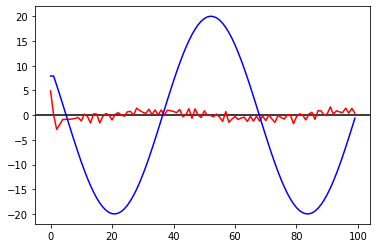

In [ ]:
plt.axhline(color='black')                                  #Temperatura ideal
plt.plot(range(0, total_steps), agent_res, color='red')     #Temperatura con el agente
plt.plot(range(0, total_steps), external_res, color='blue') #Temperatura sin agente

# Cuarto cambio

Sacar parte del else if

In [ ]:
class AgentReflex():
  def __init__(self):
    self.prev = 0

  def update_model(self,  obs):
    if obs < 0 and self.prev < 0:
      self.model = "frio"
    elif obs > 0 and self.prev > 0:
      self.model = "calor"
    else:
      self.model = "neutro"

  def lookup(self, obs):
        self.update_model(obs)
        if obs > 2:
            self.prevAct = -3
        elif obs > 1:
            self.prevAct = -2
        elif obs > 0.5:
            self.prevAct = -1
        elif obs < -2:
            self.prevAct = 3
        elif obs < -1:
            self.prevAct = 2  
        elif obs < -0.5:
            self.prevAct = 1
        else:
            self.prevAct = 0
        self.prev = obs
        if self.model == "frio" and self.prevAct < 3:
          self.prevAct = self.prevAct + 1
        elif self.model == "calor"and self.prevAct > -3:
          self.prevAct = self.prevAct - 1
        return self.prevAct

In [ ]:
goal_temp = np.zeros(total_steps)
print("Variación media con el agente: ", mean_absolute_error(goal_temp, agent_res))
print("Variación media sin el agente: ", mean_absolute_error(goal_temp, external_res))

Variación media con el agente:  0.6802999999999999
Variación media sin el agente:  12.2971


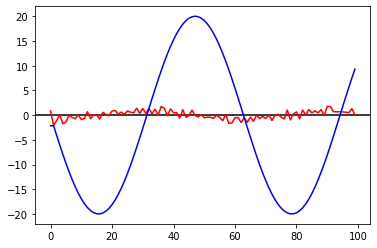

In [ ]:
plt.axhline(color='black')                                  #Temperatura ideal
plt.plot(range(0, total_steps), agent_res, color='red')     #Temperatura con el agente
plt.plot(range(0, total_steps), external_res, color='blue') #Temperatura sin agente